### Importação dos dados



In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


In [68]:
lojas = [loja, loja2, loja3, loja4]
lojas_limpo = []

for i, l in enumerate(lojas, start=1):
    limpo = l.dropna()
    lojas_limpo.append(limpo)
    print(f"Loja {i}:")
    print(f" - Linhas antes: {len(l)}")
    print(f" - Linhas depois: {len(limpo)}\n")

Loja 1:
 - Linhas antes: 2359
 - Linhas depois: 2359

Loja 2:
 - Linhas antes: 2359
 - Linhas depois: 2359

Loja 3:
 - Linhas antes: 2359
 - Linhas depois: 2359

Loja 4:
 - Linhas antes: 2358
 - Linhas depois: 2358



In [69]:
# Após juntar as lojas
df_unificado = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Agora removendo qualquer linha que tenha valor faltante
df_unificado = df_unificado.dropna()

# Conferindo
print(f"Total de registros após remoção de linhas vazias: {len(df_unificado)}")


Total de registros após remoção de linhas vazias: 9435


#1. Análise do faturamento


In [70]:
# Cálculo do faturamento total (soma de Preço)
faturamento_total = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Faturamento Total (R$)': [
        round(loja['Preço'].sum(), 2),
        round(loja2['Preço'].sum(), 2),
        round(loja3['Preço'].sum(), 2),
        round(loja4['Preço'].sum(), 2)
    ]
})

# Exibir ordenado por faturamento
faturamento_total = faturamento_total.sort_values(by='Faturamento Total (R$)', ascending=False).reset_index(drop=True)
faturamento_total


,Loja,Faturamento Total (R$)
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


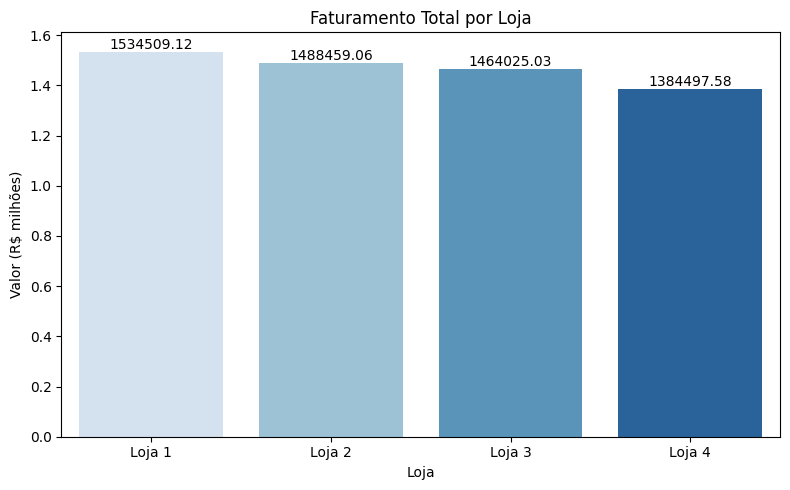

In [84]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(x='Loja', y='Faturamento Total (R$)', data=faturamento_total, hue='Loja', palette='Blues', legend=False)
plt.title('Faturamento Total por Loja')
plt.ylabel('Valor (R$ milhões)')
plt.xlabel('Loja')

# Formatar o eixo y para exibir valores em milhões
formatter = mtick.FuncFormatter(lambda x, p: f'{x / 1000000:.1f}')
ax.yaxis.set_major_formatter(formatter)

# Adicionando os valores acima das barras
for bar in ax.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.02,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [73]:
# Contagem das categorias por loja
cat_loja1 = loja['Categoria do Produto'].value_counts()
cat_loja2 = loja2['Categoria do Produto'].value_counts()
cat_loja3 = loja3['Categoria do Produto'].value_counts()
cat_loja4 = loja4['Categoria do Produto'].value_counts()

# Juntar tudo em um DataFrame
categorias_comparativo = pd.concat(
    [cat_loja1, cat_loja2, cat_loja3, cat_loja4],
    axis=1
)

# Nomeando as colunas
categorias_comparativo.columns = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Substitui NaN por 0 e transforma em inteiros
categorias_comparativo = categorias_comparativo.fillna(0).astype(int)

# Mostrar resultado
categorias_comparativo



,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
moveis,465,442,499,480
eletronicos,448,422,451,451
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
utilidades domesticas,171,181,177,201


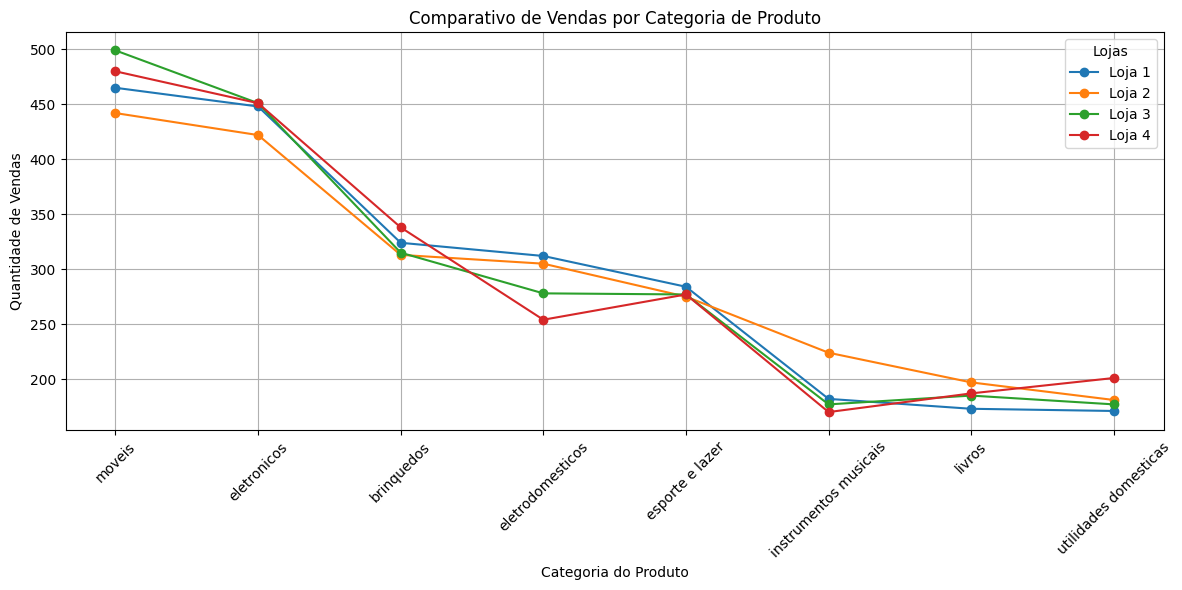

In [74]:
# Ajustar o tamanho da figura
plt.figure(figsize=(12, 6))

# Plotar as linhas para cada loja
for loja in categorias_comparativo.columns:
    plt.plot(categorias_comparativo.index, categorias_comparativo[loja], marker='o', label=loja)

# Melhorar o gráfico
plt.title('Comparativo de Vendas por Categoria de Produto')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Lojas')
plt.grid(True)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


# 3. Média de Avaliação das Lojas

In [75]:
type(loja), type(loja2), type(loja3), type(loja4)

(str,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

,Loja,Média de Avaliação
2,Loja 3,4.048326
1,Loja 2,4.037304
3,Loja 4,3.995759
0,Loja 1,3.976685


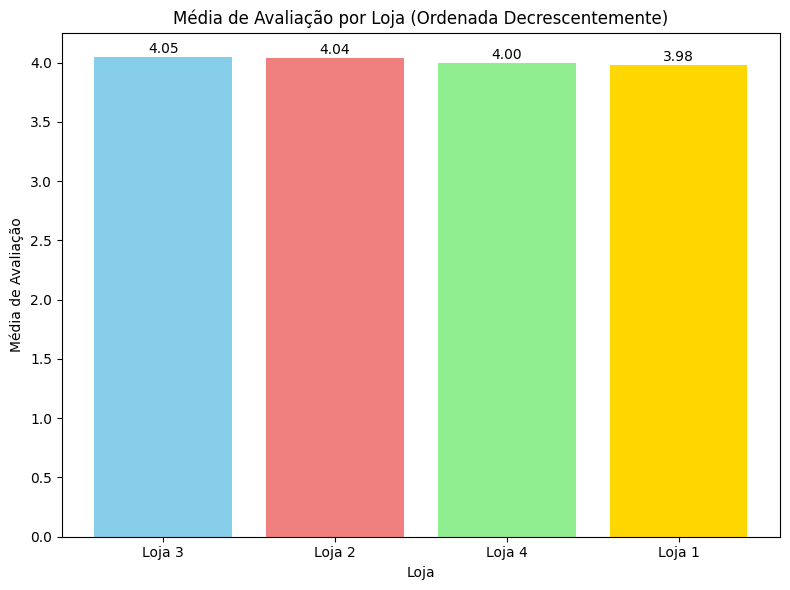

In [76]:
loja = pd.read_csv(url)
# Adicionando a identificação da loja
loja['Loja'] = 'Loja 1'
loja2['Loja'] = 'Loja 2'
loja3['Loja'] = 'Loja 3'
loja4['Loja'] = 'Loja 4'

# Concatenando os DataFrames
loja_completa = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)

# Calculando a média de avaliação por loja
media_avaliacao_por_loja = loja_completa.groupby('Loja')['Avaliação da compra'].mean().reset_index()
media_avaliacao_por_loja.rename(columns={'Avaliação da compra': 'Média de Avaliação'}, inplace=True)

# Ordenando as médias em ordem decrescente
media_avaliacao_por_loja_ordenada = media_avaliacao_por_loja.sort_values(by='Média de Avaliação', ascending=False)

# Apresentando a tabela de médias
display(media_avaliacao_por_loja_ordenada)

# Definindo as cores para cada loja
cores = ['skyblue', 'lightcoral', 'lightgreen', 'gold']  # Uma paleta de cores claras

# Gerando o gráfico de barras ordenado com valores e cores
plt.figure(figsize=(8, 6))
bars = plt.bar(media_avaliacao_por_loja_ordenada['Loja'], media_avaliacao_por_loja_ordenada['Média de Avaliação'], color=cores)

# Adicionando os valores acima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.title('Média de Avaliação por Loja (Ordenada Decrescentemente)')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [77]:
# Produtos mais vendidos
mais_vendidos = pd.DataFrame({
    'Loja 1': loja['Produto'].value_counts().idxmax(),
    'Qtd': loja['Produto'].value_counts().max(),
    'Loja 2': loja2['Produto'].value_counts().idxmax(),
    'Qtd.': loja2['Produto'].value_counts().max(),
    'Loja 3': loja3['Produto'].value_counts().idxmax(),
    'Qtd..': loja3['Produto'].value_counts().max(),
    'Loja 4': loja4['Produto'].value_counts().idxmax(),
    'Qtd...': loja4['Produto'].value_counts().max()
}, index=['Mais Vendido'])

# Produtos menos vendidos (com pelo menos 1 venda)
menos_vendidos = pd.DataFrame({
    'Loja 1': loja['Produto'].value_counts().idxmin(),
    'Qtd': loja['Produto'].value_counts().min(),
    'Loja 2': loja2['Produto'].value_counts().idxmin(),
    'Qtd.': loja2['Produto'].value_counts().min(),
    'Loja 3': loja3['Produto'].value_counts().idxmin(),
    'Qtd..': loja3['Produto'].value_counts().min(),
    'Loja 4': loja4['Produto'].value_counts().idxmin(),
    'Qtd...': loja4['Produto'].value_counts().min()
}, index=['Menos Vendido'])

# Combina os dois DataFrames
produtos_vendidos = pd.concat([mais_vendidos, menos_vendidos])

# Exibe a tabela
produtos_vendidos



,Loja 1,Qtd,Loja 2,Qtd.,Loja 3,Qtd..,Loja 4,Qtd...
Mais Vendido,Micro-ondas,60,Iniciando em programação,65,Kit banquetas,57,Cama box,62
Menos Vendido,Headset,33,Jogo de tabuleiro,32,Blocos de montar,35,Guitarra,33


# 5. Frete Médio por Loja


In [78]:
frete_medio = pd.DataFrame({
    'Loja': ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4'],
    'Frete Médio (R$)': [
        round(loja['Frete'].mean(), 2),
        round(loja2['Frete'].mean(), 2),
        round(loja3['Frete'].mean(), 2),
        round(loja4['Frete'].mean(), 2),
    ]
})

frete_medio


,Loja,Frete Médio (R$)
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


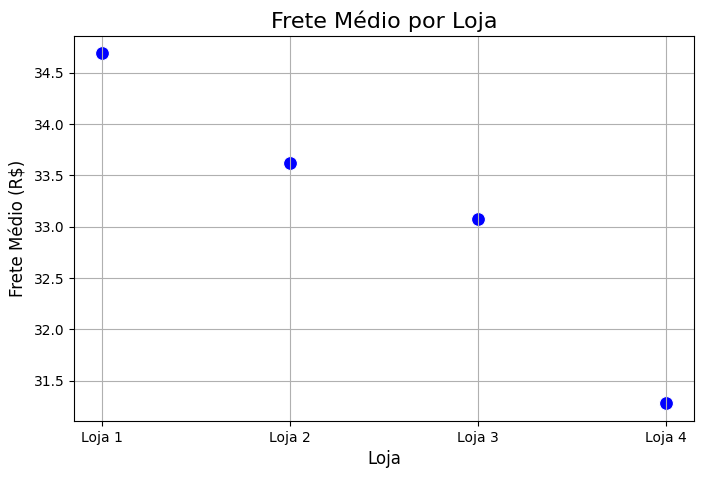

In [79]:
# Gráfico de dispersão
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Loja', y='Frete Médio (R$)', data=frete_medio, s=100, color='blue')

plt.title('Frete Médio por Loja', fontsize=16)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
plt.grid(True)
plt.show()

